<a href="https://colab.research.google.com/github/evertonsilvauea/trabalho_estatistica/blob/main/pcorrea-esilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gráficos

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

import statistics as st
from scipy import stats
from collections import Counter
import math


In [3]:
# Install git lfs first so we can get download model checkpoints
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!apt-get install git-lfs
!git lfs install

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.13.1).
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
Git LFS initialized.


In [4]:
!git clone https://github.com/evertonsilvauea/trabalho_estatistica


fatal: destination path 'trabalho_estatistica' already exists and is not an empty directory.


In [5]:
%cd trabalho_estatistica


/content/trabalho_estatistica


In [6]:
%ls

 analise-temporal-base-anac-maisa.ipynb          'Lista de Exercícios.ipynb'
 chegadas_2017.csv                                pcorrea-esilva.ipynb
 chegadas_2018.csv                                README.md
 chegadas_2019.csv                                trabalho_estatistica/
 DadosEstatisticos-com-colunas-de-interesse.csv   Trabalho_Estatística.ipynb


## Base de dados

In [8]:
dataset = pd.read_csv('DadosEstatisticos-com-colunas-de-interesse.csv',sep=';',encoding = 'latin-1')
dataset.dropna()


,EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,MÊS,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIÃO),AEROPORTO DE ORIGEM (PAÍS),AEROPORTO DE ORIGEM (CONTINENTE),AEROPORTO DE DESTINO (SIGLA),AEROPORTO DE DESTINO (NOME),AEROPORTO DE DESTINO (UF),AEROPORTO DE DESTINO (REGIÃO),AEROPORTO DE DESTINO (PAÍS),AEROPORTO DE DESTINO (CONTINENTE),NATUREZA,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),DISTÂNCIA VOADA (KM),DECOLAGENS,ASSENTOS,HORAS VOADAS,BAGAGEM (KG)
342,ABJ,ABAETÉ LINHAS AÉREAS S.A.,BRASILEIRA,2000,1,SBCV,CARAVELAS,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,SBSV,SALVADOR,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,12.0,1.0,0.0,0.0,537.0,1.0,15.0,"1,52",120.0
343,ABJ,ABAETÉ LINHAS AÉREAS S.A.,BRASILEIRA,2000,1,SBCV,CARAVELAS,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,SNTF,TEIXEIRA DE FREITAS,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,1.0,0.0,0.0,0.0,368.0,8.0,120.0,"2,73",0.0
344,ABJ,ABAETÉ LINHAS AÉREAS S.A.,BRASILEIRA,2000,1,SBLP,BOM JESUS DA LAPA,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,SBSV,SALVADOR,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,68.0,1.0,3.0,0.0,3864.0,7.0,105.0,"12,93",579.0
345,ABJ,ABAETÉ LINHAS AÉREAS S.A.,BRASILEIRA,2000,1,SBLP,BOM JESUS DA LAPA,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,SNGI,GUANAMBI,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,0.0,2.0,54.0,0.0,1778.0,14.0,210.0,"8,17",0.0
346,ABJ,ABAETÉ LINHAS AÉREAS S.A.,BRASILEIRA,2000,1,SBSV,SALVADOR,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,SBCV,CARAVELAS,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,4.0,1.0,0.0,0.0,537.0,1.0,15.0,"1,65",15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886460,VDA,VOLGA DNEPR AIRLINES,ESTRANGEIRA,2020,8,SBBR,BRASÍLIA,DF,CENTRO-OESTE,BRASIL,AMÉRICA DO SUL,SBKP,CAMPINAS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,0.0,0.0,0.0,0.0,798.0,1.0,0.0,"1,333",0.0
886489,VVC,VIVAAIR - FASTCOLOMBIA,ESTRANGEIRA,2020,7,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,0.0,0.0,0.0,0.0,8091.0,3.0,564.0,"12,417",0.0
886494,VVC,VIVAAIR - FASTCOLOMBIA,ESTRANGEIRA,2020,8,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,0.0,0.0,0.0,0.0,2697.0,1.0,188.0,"3,967",0.0
886501,WAL,CARIBBEAN SUN AIRLINES DBA WORLD ATLANTIC AIRL...,ESTRANGEIRA,2020,5,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,0.0,0.0,0.0,0.0,2697.0,1.0,155.0,"3,5",0.0


## Gráfico de dispersão

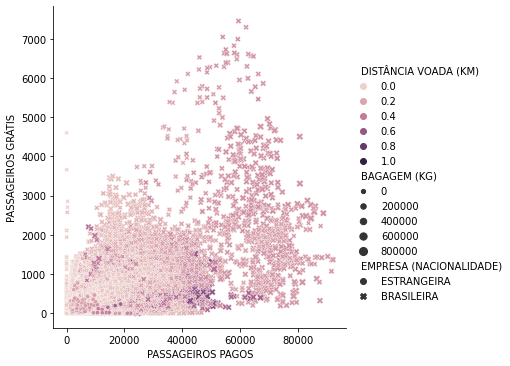

In [ ]:
# fig = plt.figure(figsize=(40,10))
# plt.title('Gráfico de Dispersão', fontsize=40)
# sns.relplot(x = 'PAYLOAD', y = 'ASSENTOS', data=dataset,
#             hue = 'EMPRESA (NACIONALIDADE)', style = 'EMPRESA (NACIONALIDADE)', size = 'BAGAGEM (KG)');
sns.relplot(x = 'PASSAGEIROS PAGOS', y = 'PASSAGEIROS GRÁTIS', data=dataset,
            hue = 'DISTÂNCIA VOADA (KM)', style = 'EMPRESA (NACIONALIDADE)', size = 'BAGAGEM (KG)');

## Gráfico de barra e setor (pizza)

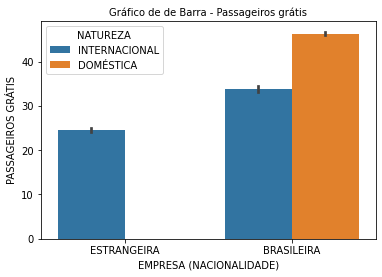

In [ ]:
# sns.relplot(x = 'age', y = 'final-weight', data=dataset,
#             hue = 'income', style = 'sex', size = 'education-num');
plt.title('Gráfico de de Barra - Passageiros grátis', fontsize=10)
sns.barplot(x = 'EMPRESA (NACIONALIDADE)', y = 'PASSAGEIROS GRÁTIS', data=dataset, hue = 'NATUREZA');

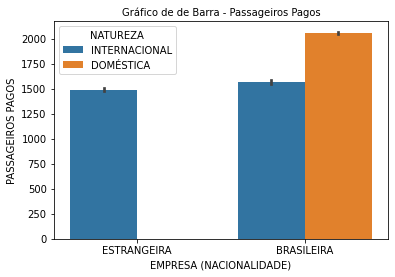

In [ ]:
plt.title('Gráfico de de Barra - Passageiros Pagos', fontsize=10)
sns.barplot(x = 'EMPRESA (NACIONALIDADE)', y = 'PASSAGEIROS PAGOS', data=dataset, hue = 'NATUREZA');

In [ ]:
dados_agrupados = dataset.groupby(['EMPRESA (NACIONALIDADE)'])['BAGAGEM (KG)'].sum()
dados_agrupados

EMPRESA (NACIONALIDADE)
BRASILEIRA     1.666200e+10
ESTRANGEIRA    0.000000e+00
Name: BAGAGEM (KG), dtype: float64

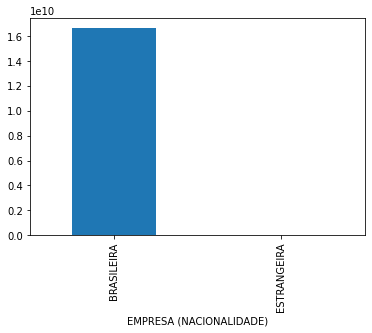

In [ ]:
dados_agrupados.plot.bar();

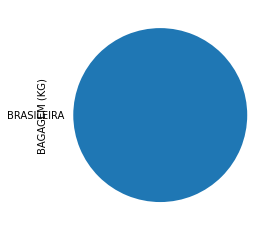

In [ ]:
dados_agrupados.plot.pie();

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


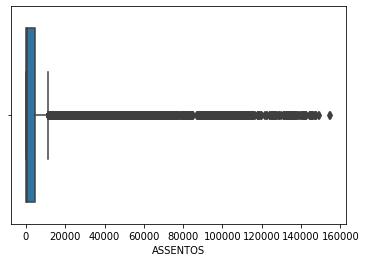

In [ ]:
sns.boxplot(dataset.ASSENTOS);

##Quantidade de voos que partem de Manaus para cada destino

In [81]:
dataset_manaus = dataset[dataset['AEROPORTO DE ORIGEM (NOME)']=='MANAUS'] 
#dataset_manaus.head()
dataset_manaus2= dataset_manaus['AEROPORTO DE DESTINO (NOME)'].value_counts().to_frame()
dataset_manaus2.head(10)

,AEROPORTO DE DESTINO (NOME)
GUARULHOS,1886
BELÉM,1522
BRASÍLIA,1262
SANTARÉM,1180
"MIAMI, FLORIDA",1175
BOGOTÁ,1162
CAMPINAS,1078
RIO DE JANEIRO,1025
PORTO VELHO,1001
BOA VISTA,980


In [25]:
def coeficient_of_variation(var):
  _cv = round(100*st.stdev(var)/st.mean(var), 2)
  return _cv

In [53]:
def functionStatiscals(colum):
  _res = 0
  passageiros_gratis = []
  for x in dataset_manaus[colum]:
    # i = i + 1
    if not math.isnan(x):
      _res = _res + x
      
      passageiros_gratis.append(x)
  print(f'{colum:#^53}')
  print(f'A média é: {round(st.mean(passageiros_gratis))}')
  print(f'A mediana é: {round(st.median(passageiros_gratis))}')
  print(f'A moda é: {round(st.mode(passageiros_gratis))}')
  print(f'A desvio padrão é: {round(st.pstdev(passageiros_gratis))}')
  print(f'A variância é: {round(st.variance(passageiros_gratis))}')
  print(f'A coeficiente de variação é: {coeficient_of_variation(passageiros_gratis)}')
  print(stats.describe(dataset_manaus[colum].dropna()))
functionStatiscals('PASSAGEIROS GRÁTIS')


#################PASSAGEIROS GRÁTIS##################
A média é: 15
A mediana é: 0
A moda é: 0
A desvio padrão é: 54
A variância é: 2928
A coeficiente de variação é: 368.51
DescribeResult(nobs=29787, minmax=(0.0, 3660.0), mean=14.684426091919294, variance=2928.276425342914, skewness=14.892302558063248, kurtosis=723.2895254111106)


In [67]:
def plotBox(colum):
  _res_boxplot = sns.boxplot(dataset_manaus[colum])
  _res_boxplot.figure.set_size_inches(15,7)
  _res_boxplot.set_title(colum, fontsize=20)

In [83]:
def plotDist(colum):
  _res_boxplot = sns.distplot(dataset_manaus[colum])
  _res_boxplot.figure.set_size_inches(15,7)
  _res_boxplot.set_title(colum, fontsize=20)

In [21]:
for _i in dataset_manaus:
  print(_i)

EMPRESA (SIGLA)
EMPRESA (NOME)
EMPRESA (NACIONALIDADE)
ANO
MÊS
AEROPORTO DE ORIGEM (SIGLA)
AEROPORTO DE ORIGEM (NOME)
AEROPORTO DE ORIGEM (UF)
AEROPORTO DE ORIGEM (REGIÃO)
AEROPORTO DE ORIGEM (PAÍS)
AEROPORTO DE ORIGEM (CONTINENTE)
AEROPORTO DE DESTINO (SIGLA)
AEROPORTO DE DESTINO (NOME)
AEROPORTO DE DESTINO (UF)
AEROPORTO DE DESTINO (REGIÃO)
AEROPORTO DE DESTINO (PAÍS)
AEROPORTO DE DESTINO (CONTINENTE)
NATUREZA
PASSAGEIROS PAGOS
PASSAGEIROS GRÁTIS
CARGA PAGA (KG)
CARGA GRÁTIS (KG)
DISTÂNCIA VOADA (KM)
DECOLAGENS
ASSENTOS
HORAS VOADAS
BAGAGEM (KG)


In [82]:
_res = 0
carga_gratis = []
for x in dataset_manaus['CARGA GRÁTIS (KG)']:
  # i = i + 1
  if not math.isnan(x) and x <= 27:
    _res = _res + x
    
    carga_gratis.append(x)


print(f'total de carga_paga é {round(_res)}')

total de carga_paga é 21891


##Mediana, Média, Moda e Desvio Padrão - Manaus

###Voos Cargas Grátis

In [62]:
functionStatiscals('CARGA GRÁTIS (KG)')

##################CARGA GRÁTIS (KG)##################
A média é: 64
A mediana é: 0
A moda é: 0
A desvio padrão é: 713
A variância é: 508160
A coeficiente de variação é: 1105.38
DescribeResult(nobs=29787, minmax=(0.0, 59188.0), mean=64.48947527444858, variance=508160.2764872927, skewness=38.432172094223844, kurtosis=2355.1020315135574)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


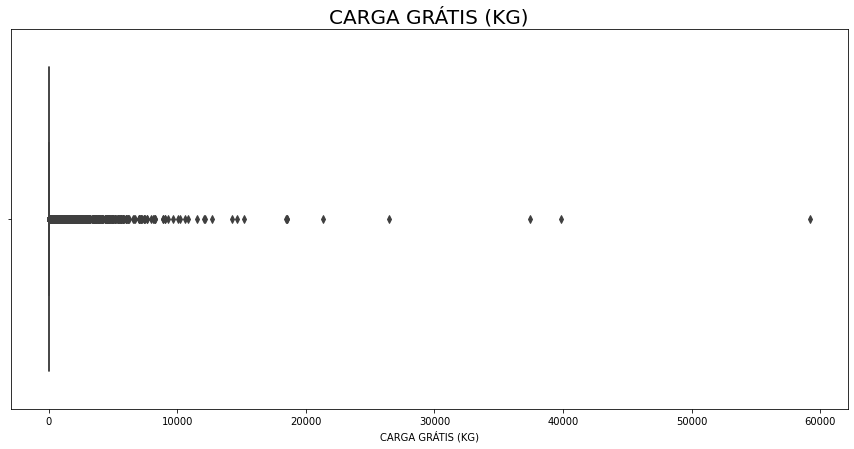

In [68]:
plotBox('CARGA GRÁTIS (KG)')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


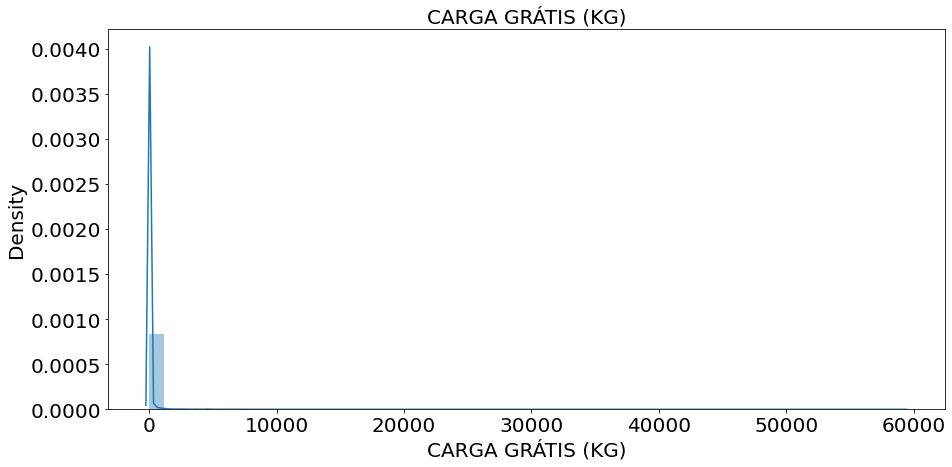

In [84]:
plotDist('CARGA GRÁTIS (KG)')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


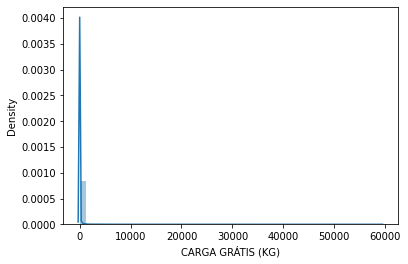

In [32]:
sns.distplot(dataset_manaus['CARGA GRÁTIS (KG)'])

###Voos Carga Pagas

In [55]:
functionStatiscals('CARGA PAGA (KG)')


###################CARGA PAGA (KG)###################
A média é: 31488
A mediana é: 10
A moda é: 0
A desvio padrão é: 160939
A variância é: 25902352112
A coeficiente de variação é: 511.12
DescribeResult(nobs=29787, minmax=(0.0, 4018286.0), mean=31487.900459932185, variance=25902352111.9113, skewness=10.403103349433056, kurtosis=137.47792502447368)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


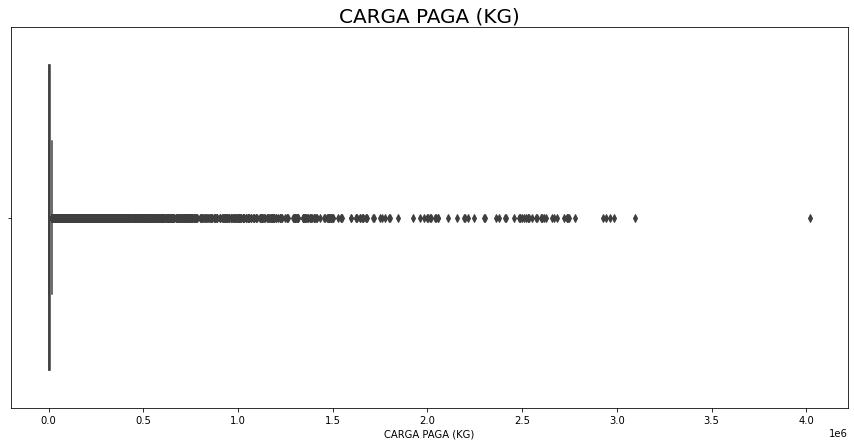

In [69]:
plotBox('CARGA PAGA (KG)')

###Voos Passageiros Grátis

In [56]:
functionStatiscals('PASSAGEIROS GRÁTIS')

#################PASSAGEIROS GRÁTIS##################
A média é: 15
A mediana é: 0
A moda é: 0
A desvio padrão é: 54
A variância é: 2928
A coeficiente de variação é: 368.51
DescribeResult(nobs=29787, minmax=(0.0, 3660.0), mean=14.684426091919294, variance=2928.276425342914, skewness=14.892302558063248, kurtosis=723.2895254111106)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


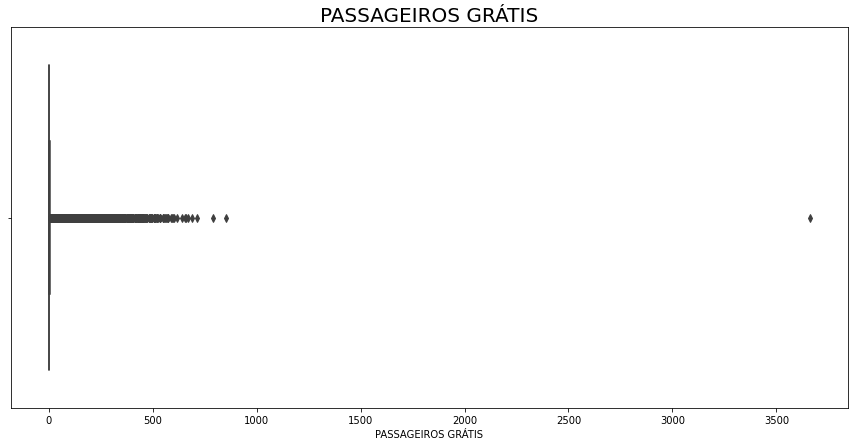

In [70]:
plotBox('PASSAGEIROS GRÁTIS')

###Voos Passageiros Pagos

In [57]:
functionStatiscals('PASSAGEIROS PAGOS')

##################PASSAGEIROS PAGOS##################
A média é: 765
A mediana é: 50
A moda é: 0
A desvio padrão é: 1903
A variância é: 3620527
A coeficiente de variação é: 248.78
DescribeResult(nobs=29787, minmax=(0.0, 25830.0), mean=764.8408701782657, variance=3620527.062100472, skewness=4.3151648990858, kurtosis=23.955859068914727)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


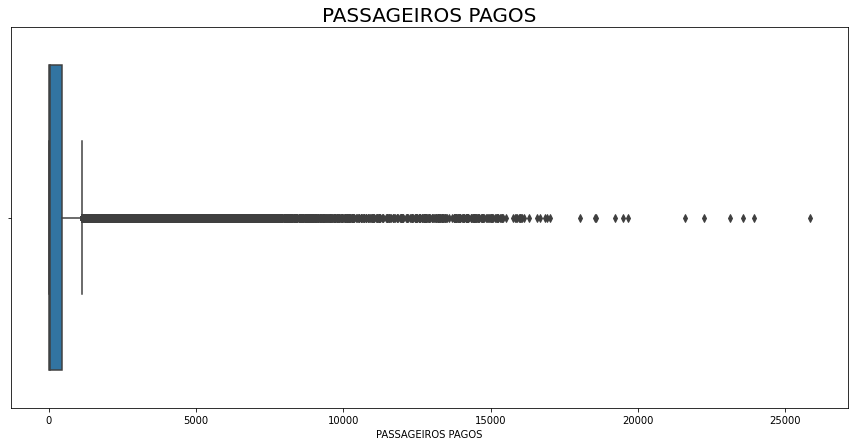

In [71]:
plotBox('PASSAGEIROS PAGOS')

###Voos Bagagens em KG

In [58]:
functionStatiscals('BAGAGEM (KG)')

####################BAGAGEM (KG)#####################
A média é: 12232
A mediana é: 1301
A moda é: 0
A desvio padrão é: 27922
A variância é: 779679551
A coeficiente de variação é: 228.28
DescribeResult(nobs=25210, minmax=(0.0, 298532.0), mean=12231.73677112257, variance=779679550.8088862, skewness=3.8334198900039453, kurtosis=17.743339878079034)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


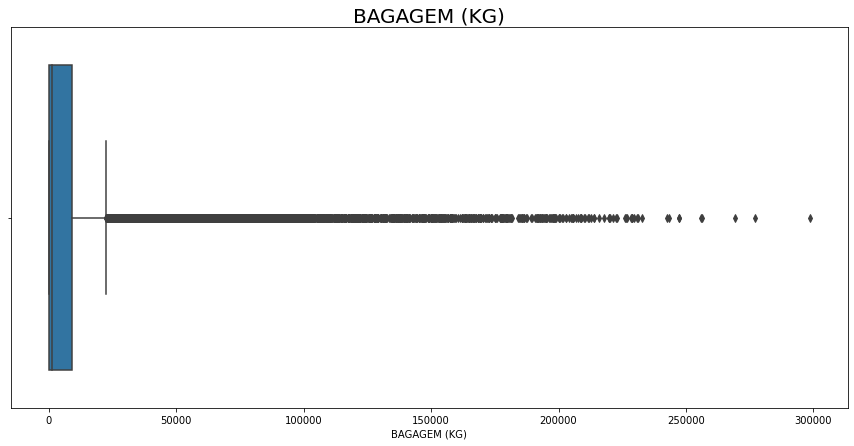

In [72]:
plotBox('BAGAGEM (KG)')

##Voos que parte de Manaus

In [ ]:
count_manaus = dataset[dataset['AEROPORTO DE ORIGEM (NOME)']=='MANAUS'].value_counts().to_frame()
print(len(count_manaus))
count_manaus.head()

14456


,,,,,,,,,,,,,,,,,,,,,,,,,,,0
EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,MÊS,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIÃO),AEROPORTO DE ORIGEM (PAÍS),AEROPORTO DE ORIGEM (CONTINENTE),AEROPORTO DE DESTINO (SIGLA),AEROPORTO DE DESTINO (NOME),AEROPORTO DE DESTINO (UF),AEROPORTO DE DESTINO (REGIÃO),AEROPORTO DE DESTINO (PAÍS),AEROPORTO DE DESTINO (CONTINENTE),NATUREZA,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),DISTÂNCIA VOADA (KM),DECOLAGENS,ASSENTOS,HORAS VOADAS,BAGAGEM (KG),
PEP,PENTA,BRASILEIRA,2004,9,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,SBSN,SANTARÉM,PA,NORTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,0.0,0.0,0.0,0.0,589.0,1.0,0.0,"1,9",0.0,2
TTL,TOTAL LINHAS AÉREAS S.A.,BRASILEIRA,2002,6,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,0.0,0.0,0.0,0.0,0.0,1.0,47.0,"2,5",0.0,2
MEL,MEGA LINHAS AÉREAS LTDA.,BRASILEIRA,2007,1,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,SWEU,CARACARAÍ,RR,NORTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,0.0,0.0,0.0,0.0,463.0,1.0,0.0,"1,2",0.0,2
RLE,RICO,BRASILEIRA,2000,10,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,SBUA,SÃO GABRIEL DA CACHOEIRA,AM,NORTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,4.0,0.0,1158.0,0.0,835.0,1.0,18.0,"2,47",55.0,2
TTL,TOTAL LINHAS AÉREAS S.A.,BRASILEIRA,2016,11,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,0.0,0.0,0.0,0.0,0.0,1.0,48.0,"0,42",0.0,2


In [ ]:
# plt.bar(count_manaus.index,dataset[dataset['AEROPORTO DE ORIGEM (NOME)']=='MANAUS'])
# plt.show()

count_manaus.plot.bar()

##Classificação de voos

In [78]:
def plotPizza(colum,*item):
  plt.rcParams.update({'font.size':20})
  label = [*item]
  x = dataset.groupby(by=colum).size()
  explode = (0.1,0)
  plt.figure(figsize=(5,5))
  plt.pie(x=x, labels=label,explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
  plt.title('Classificação de voos',fontsize=20)


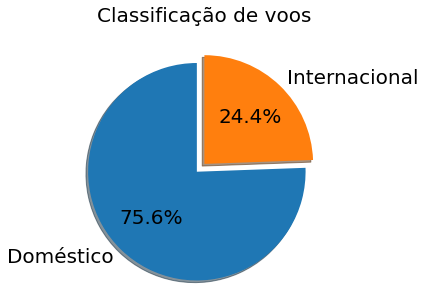

In [79]:
plotPizza('NATUREZA','Doméstico', 'Internacional')

##Mediana, Média, Moda e Desvio Padrão




In [ ]:
newdataset = dataset.dropna()

dataset_manaus_value = newdataset.iloc[:]['PASSAGEIROS PAGOS']
print(dataset_manaus_value)
i = 0
res = 0
for x in dataset_manaus_value:
  i = i + 1
  #print(x)
  res = res + int(x)
print(f'total de passageiros pagos é {res}')

print(f'A mediana de passageiros é {round(st.median(dataset_manaus_value))}')
print(f'A média de passageiros é {round(st.mean(dataset_manaus_value))}')
print(f'A moda de passageiros é {round(st.mode(dataset_manaus_value))}')
print(f'A desvio padrão de passageiros é {round(st.pstdev(dataset_manaus_value))}')
#print(f'A moda de passageiros é {st.multimode(dataset_manaus_value)}')

342       12.0
343        1.0
344       68.0
345        0.0
346        4.0
          ... 
886460     0.0
886489     0.0
886494     0.0
886501     0.0
886503     0.0
Name: PASSAGEIROS PAGOS, Length: 477838, dtype: float64
total de passageiros pagos é 1267349974
A mediana de passageiros é 447
A média de passageiros é 2652
A moda de passageiros é 0
A desvio padrão de passageiros é 5482


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


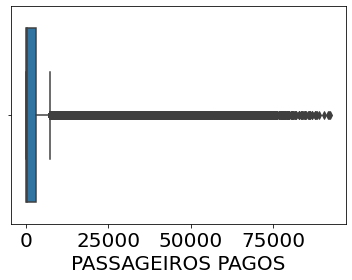

In [ ]:
sns.boxplot(dataset_manaus_value)